In [21]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 18 08:51:37 2018

@author: Rene
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from skimage.draw import circle
from numpy.fft import fft2,ifft2,fftshift,ifftshift

def FFT(aperture):
    f = plt.figure(figsize=(20,60))
    ax1 = f.add_subplot(131)
    ax1.imshow(aperture, cmap = 'gray')
    ft_aperture = fft2(aperture)
    FT_aperture = fftshift(np.abs(ft_aperture))
    ax2 = f.add_subplot(132)
    ax2.imshow(FT_aperture, cmap = 'gray')
    ift_aperture = ifft2(ft_aperture)
    ax3 = f.add_subplot(133)
    ax3.imshow(np.abs(ift_aperture), cmap = 'gray')
    #plt.imshow(aperture, cmap = 'gray')
    #plt.show()
    #plt.imshow(FT_aperture, cmap = 'gray')
    #plt.show()
    #plt.imshow(np.abs(ift_aperture), cmap = 'gray')
    #plt.show()


def Circ(r): #circle
    L = 256
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    x, y = circle(*center, r)
    aperture[x, y] = 1
    
    return aperture

def Rec(w,h): #rectangle
    L = 256
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    for i in np.arange(center[0]-w//2,center[0]+w//2): #width
        for j in np.arange(center[1]-h//2,center[1]+h//2) : #height
            aperture[int(i)][int(j)] = 1
            
    return aperture

def Slit(d,h,w): #doubleslit
    L = 256
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    x = (center[0]-d/2,center[0]+d/2)
    for i1 in np.arange(x[0]-w,x[0]):
        for i2 in np.arange(x[1], x[1]+w):
            for j in np.arange(center[1]-h//2,center[1]+h//2):
                aperture[int(j)][int(i1)] = 1
                aperture[int(j)][int(i2)] = 1

            
    return aperture     

def Gaussian(sigma):
    L = 256
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    for i in np.arange(center[0]-L//2,center[0]+L//2):
        for j in np.arange(center[1]-L//2,center[1]+L//2):
            aperture[int(i)][int(j)] += np.abs(np.exp(-((i-L/2)*(i-L/2)+(j-L/2)*(j-L/2))/(2*sigma*sigma)))
            
    return aperture


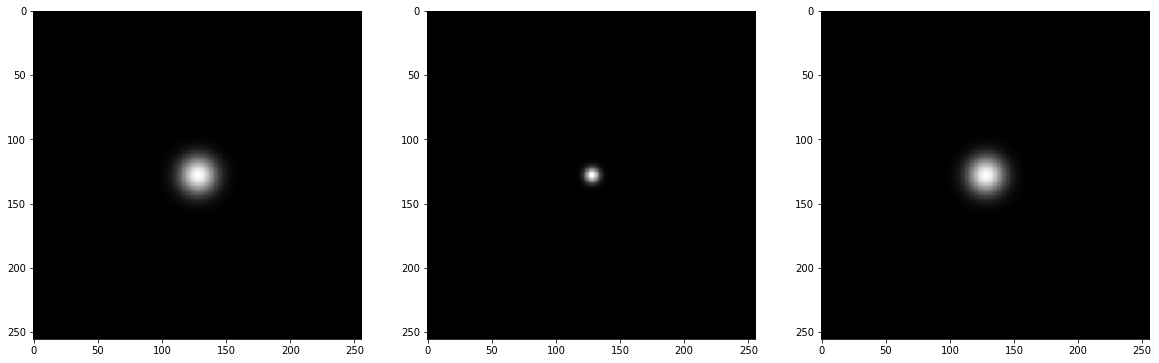

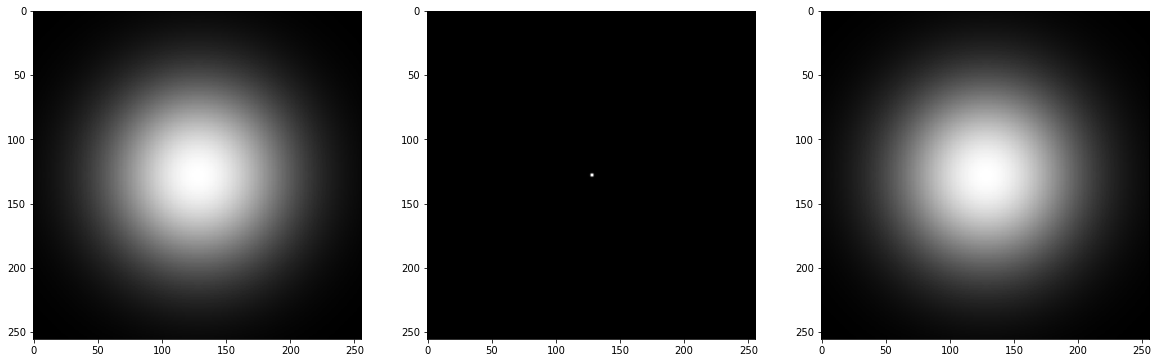

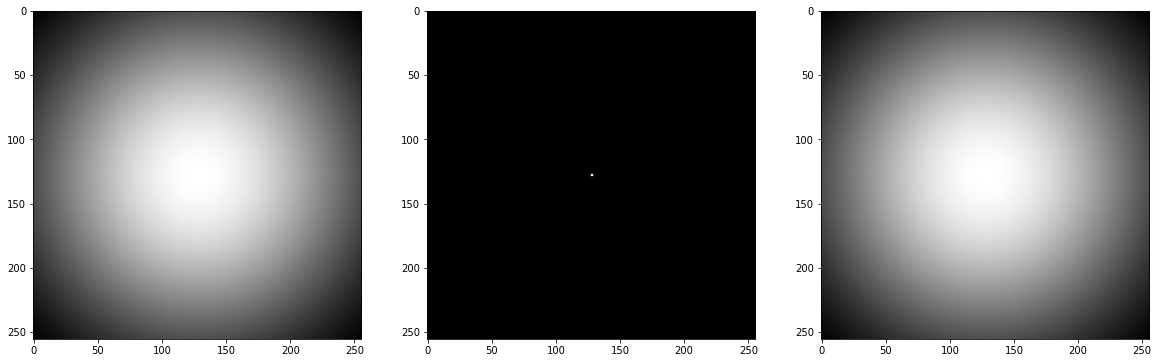

In [27]:
FFT(Gaussian(10))
FFT(Gaussian(50))
FFT(Gaussian(100))

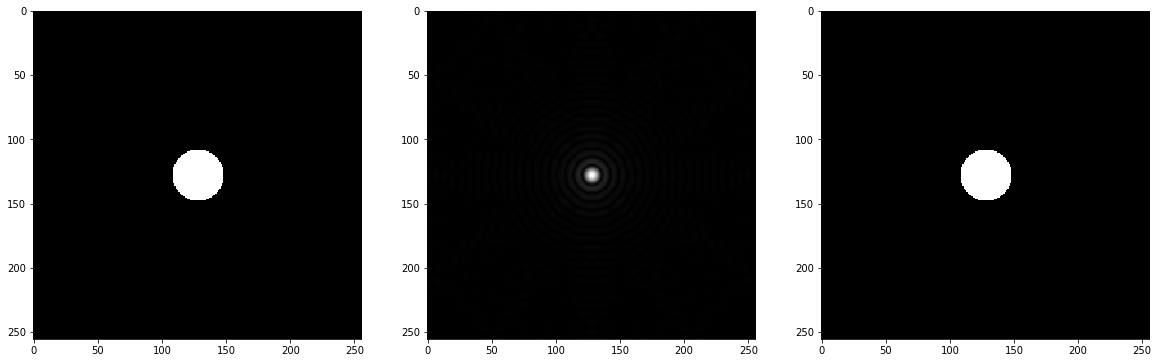

In [23]:
FFT(Circ(20))

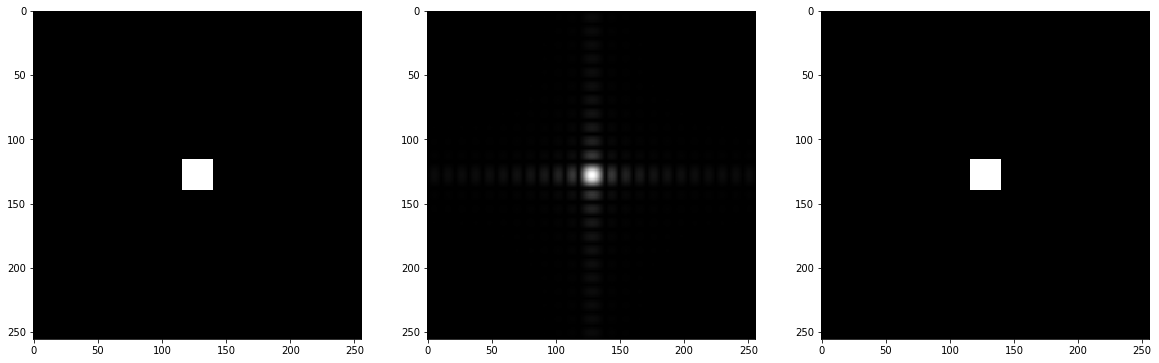

In [24]:
FFT(Rec(25,25))

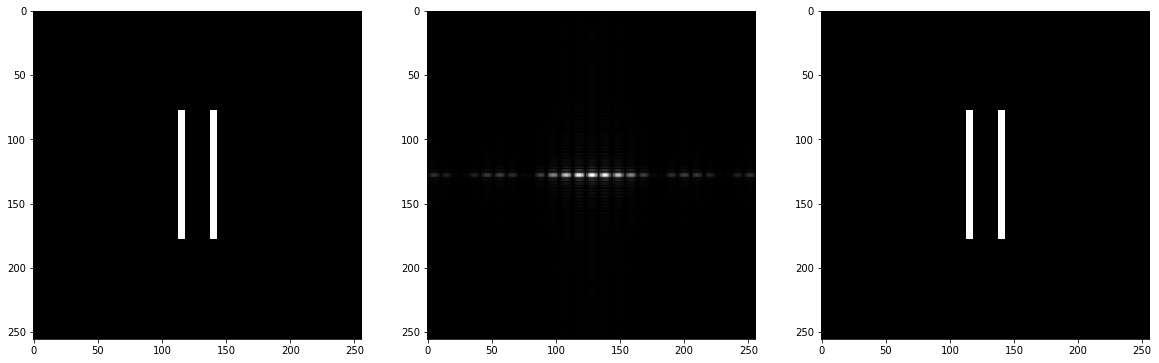

In [25]:
FFT(Slit(20,100, 5))

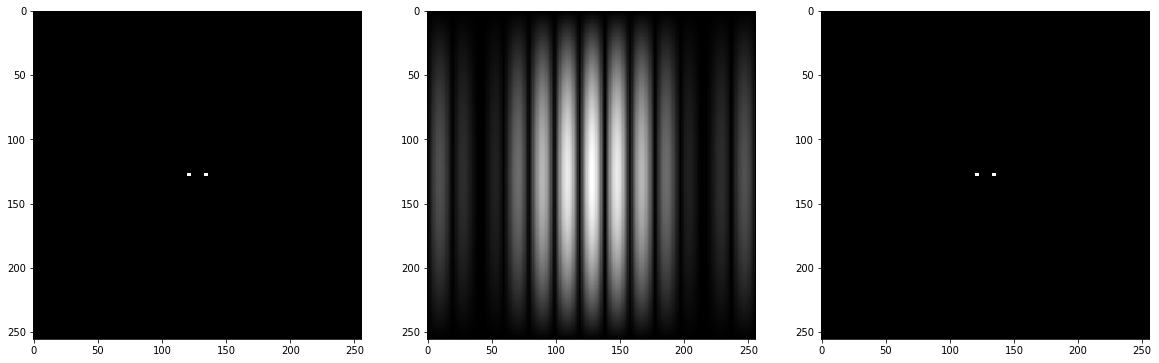

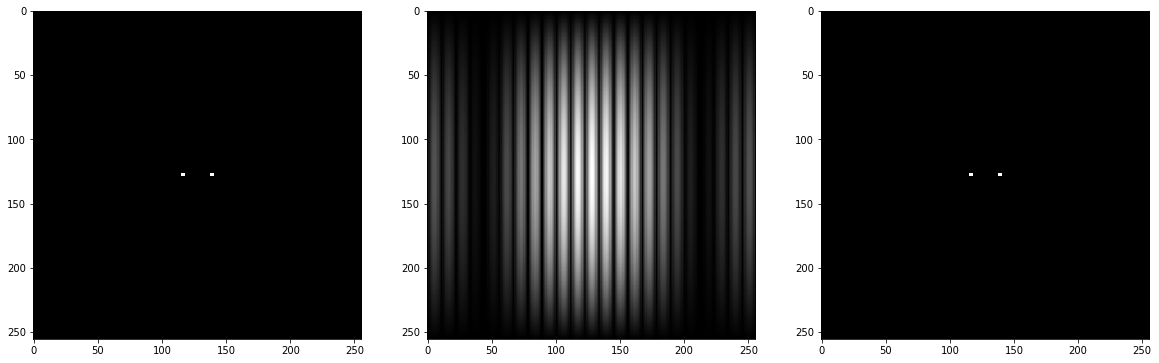

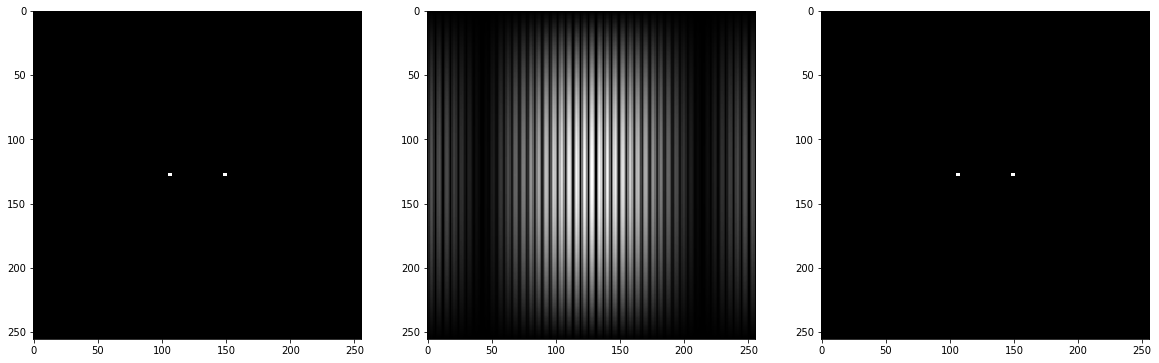

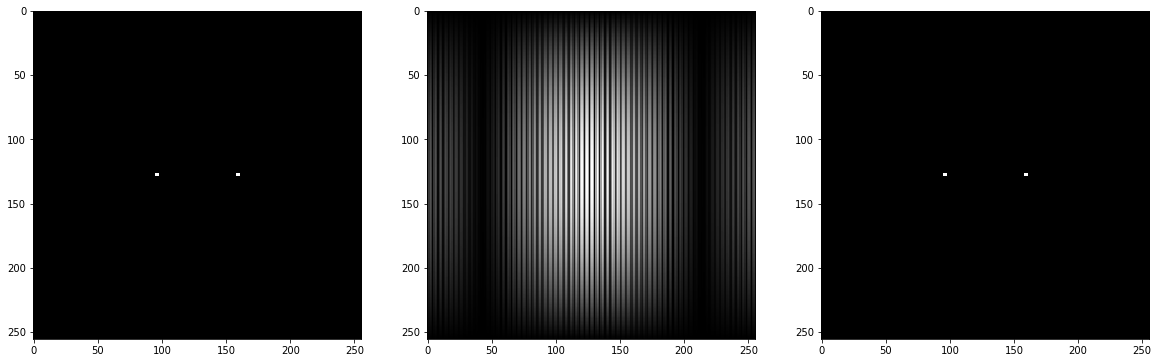

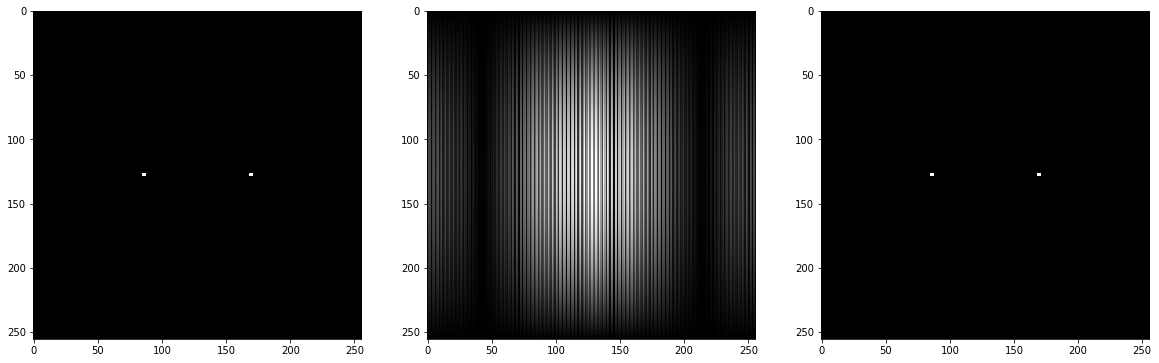

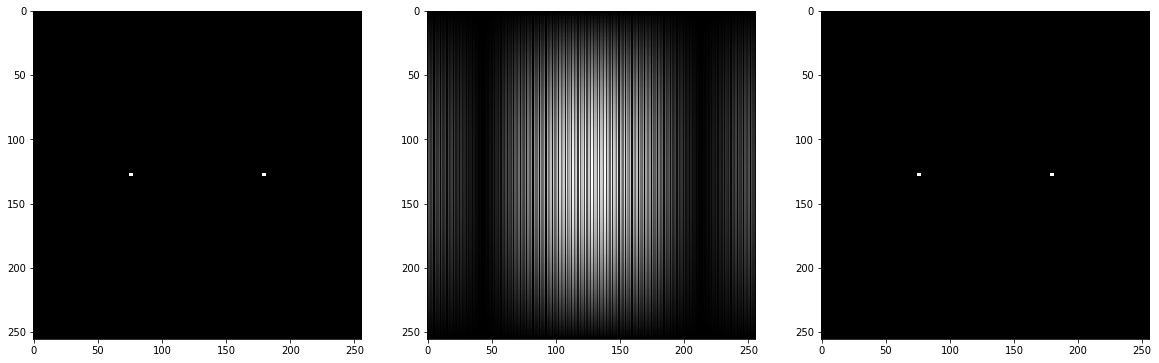

In [26]:
FFT(Slit(10,3,3))
FFT(Slit(20,3,3))
FFT(Slit(40,3,3))
FFT(Slit(60,3,3))
FFT(Slit(80,3,3))
FFT(Slit(100,3,3))